# RW Fit

Here we fit the RW model to determine the learning rates for each simulated participant

In [54]:
import sys
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

import seaborn as sns

sys.path.append('../../rw_models')
sys.path.append('rw_models')

base_path = '/u/jschubert/learning_bias/humans/optimism/data/'
orig = pd.read_csv(f'{base_path}exp1.csv')
df_sim = orig
# Set initial regret to 0
df_sim['regret'] = 0

# Update regret based on specific conditions
df_sim['regret'] = np.where((df_sim['cues'] == 1) & (df_sim['actions'] == 1), 0.375, df_sim['regret'])
df_sim['regret'] = np.where((df_sim['cues'] == 2) & (df_sim['actions'] == 0), 0.375, df_sim['regret'])

# Count trials for each casino separately from 0 to 23
df_sim['trial_cue'] = df_sim.groupby(['participant_idx', 'cues']).cumcount()

# Swap values 1 and 2 in the 'cues' column
# this is because cue 1 and cue 2 have been switched in all other analyses
df_sim['cues'] = df_sim['cues'].replace({1: 2, 2: 1})

human = df_sim
# rename columns
human = human.rename(columns={'participant_idx': 'run',
                              'cues': 'cue',
                              'actions': 'action',
                              'rewards': 'reward',
                              'regret': 'regret',
                              'trial_cue': 'cue_idx'})
human.drop(columns=['Unnamed: 0'], inplace=True)
human

,run,trials_idx,cue,action,reward,regret,cue_idx
0,0,0,1.0,0.0,0.0,0.375,0
1,0,1,3.0,1.0,0.5,0.000,0
2,0,2,3.0,1.0,0.5,0.000,1
3,0,3,1.0,0.0,0.0,0.375,1
4,0,4,0.0,1.0,0.0,0.000,0
...,...,...,...,...,...,...,...
4795,49,91,0.0,0.0,0.0,0.000,21
4796,49,92,0.0,0.0,0.0,0.000,22
4797,49,93,2.0,0.0,0.5,0.000,23
4798,49,94,3.0,1.0,0.5,0.000,23


In [56]:
base_path = '/u/jschubert/learning_bias/humans/optimism/data/'
from glob import glob

dfs = [pd.read_csv(path) for path in glob('/u/jschubert/learning_bias/llm/optim_bias/data/claude-1/run_*.csv')]
df = pd.concat(dfs, ignore_index=True).drop(columns=['Unnamed: 0'])
df['casino'] = df['casino']-1
df['cues'] = df['casino']
df_sim = df

df['rewards'].replace({0: 0, 1: 0.5}, inplace=True)


# Set initial regret to 0
df_sim['regret'] = 0

# Update regret based on specific conditions
df_sim['regret'] = np.where((df_sim['cues'] == 1) & (df_sim['choice'] == 0), 0.375, df_sim['regret'])
df_sim['regret'] = np.where((df_sim['cues'] == 2) & (df_sim['choice'] == 1), 0.375, df_sim['regret'])

# count trials for each casino seperately from 0 to 23
df_sim['trial_cue'] = df_sim.groupby(['run', 'casino']).cumcount()

llm = df_sim

llm = llm.rename(columns={'run': 'run',
                        'cues': 'cue',
                        'choice': 'action',
                        'rewards': 'reward',
                        'regret': 'regret',
                        'trial_cue': 'cue_idx',
                        'trial': 'trials_idx'})
llm

,run,trials_idx,casino,mean0,mean1,reward0,reward1,action,reward,cue,regret,cue_idx
0,37,0,1,0.25,0.75,0.0,1.0,0,0.0,1,0.375,0
1,37,1,1,0.25,0.75,0.0,1.0,1,0.5,1,0.000,1
2,37,2,1,0.25,0.75,0.0,1.0,1,0.5,1,0.000,2
3,37,3,0,0.25,0.25,1.0,0.0,1,0.0,0,0.000,0
4,37,4,1,0.25,0.75,1.0,1.0,1,0.5,1,0.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4795,20,91,0,0.25,0.25,0.0,0.0,1,0.0,0,0.000,21
4796,20,92,3,0.75,0.75,1.0,1.0,1,0.5,3,0.000,23
4797,20,93,0,0.25,0.25,0.0,1.0,1,0.5,0,0.000,22
4798,20,94,0,0.25,0.25,1.0,0.0,1,0.0,0,0.000,23


In [58]:
# merge llm and human into one df with a new column 'agent' to distinguish between the two as llm and human
df = pd.concat([human, llm], keys=['human', 'llm'], names=['agent'])
#df.drop(columns=['level_1'], inplace=True)
df.reset_index(inplace=True)
df.drop(columns=['level_1'], inplace=True)

# Performance LLM vs Human

/tmp/ipykernel_22585/2216735966.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(data=df, x='cue_idx', y='regret', hue='agent', ax=ax1, ci=95)


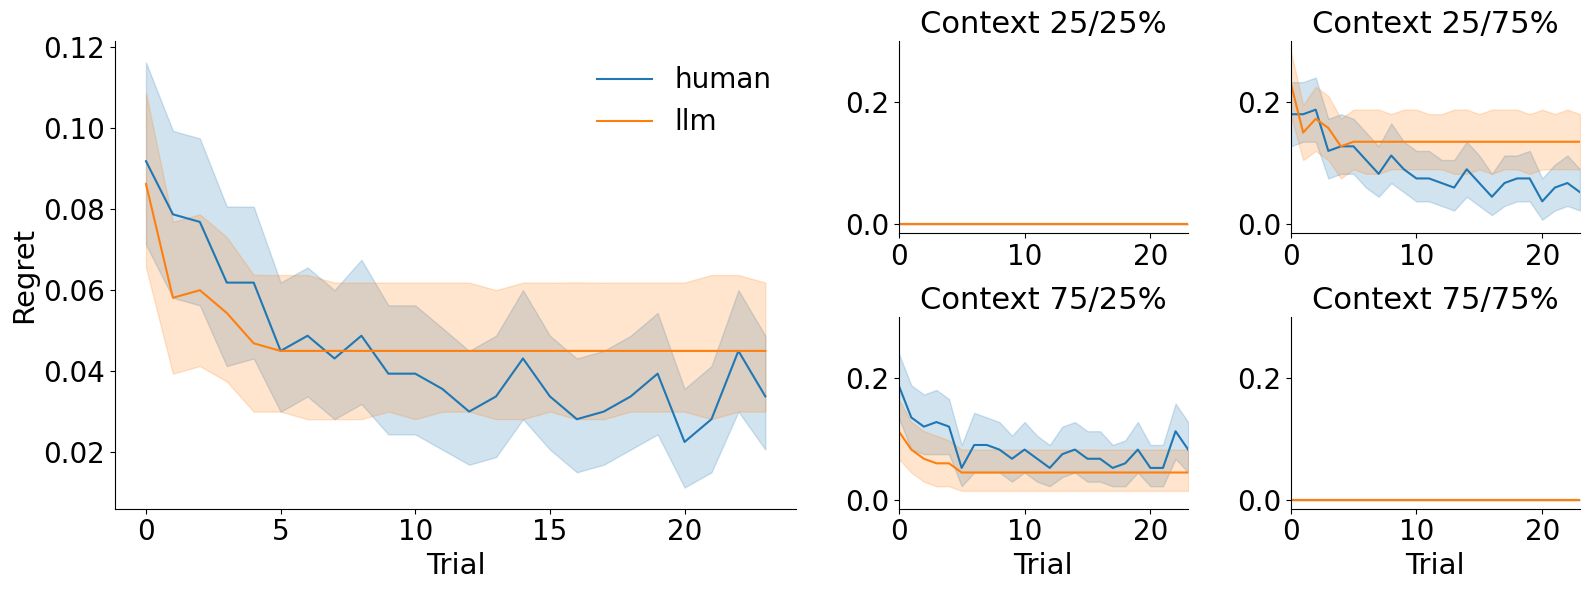

In [64]:
fig = plt.figure(figsize=(16,6), dpi=100)

# Setting up grid and positions for subplots
grid = gs.GridSpec(2, 4, figure=fig)
ax1 = fig.add_subplot(grid[0:2, 0:2])

# Plots on the right half
ax2 = fig.add_subplot(grid[0, 2])
ax3 = fig.add_subplot(grid[0, 3], sharey=ax2)
ax4 = fig.add_subplot(grid[1, 2], sharey=ax2)
ax5 = fig.add_subplot(grid[1, 3], sharey=ax2)

axs = [ax2, ax3, ax4, ax5]
title = ['Context 25/25%', 'Context 25/75%', 'Context 75/25%', 'Context 75/75%']


# Main plot
sns.lineplot(data=df, x='cue_idx', y='regret', hue='agent', ax=ax1, ci=95)
ax1.tick_params(labelsize=20)
#ax1.set_title('Test set performance', fontsize=18)
ax1.set_xlabel('Trial', fontsize=21)
ax1.set_ylabel('Regret', fontsize=21)

# Smaller plots
for i, ax in enumerate(axs):
    df_temp = df[df['cue'] == i]
    ax.grid(False)
    sns.lineplot(data=df_temp, x='cue_idx', y='regret', hue='agent', ax=ax)  
    sns.despine()
    ax.set_title(title[i], fontsize=22)
    ax.tick_params(labelsize=20)
    if i == 1 or i == 0:
        ax.set_xlabel('', fontsize=21)
    else:
        ax.set_xlabel('Trial', fontsize=21)
    ax.set_ylabel(' ', fontsize=21)
    ax.set_xlim(0,23)

# hide legend except for ax1
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()
ax5.get_legend().remove()

# legend for ax1 remove border
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='upper right', fontsize=20, frameon=False)


plt.tight_layout()
plt.show()